# D14 Số liệu thời gian

## Mục đích

Trong bài này chúng ta sẽ làm quen với kiểu số liệu thời gian và các hàm xử lí số liệu thời gian trong Pandas.


## Kiểu dữ liệu thời gian

Thời gian (ngày và giờ) luôn là một dạng dữ liệu đặc biệt trong tất cả các ngôn ngữ lập trình, lí do là vì nó có cấu trúc thông tin đặc biệt. Bên cạnh việc đọc số liệu thời gian tự động từ Excel (với những cột đã được định dạng thời gian), bạn có thể tạo ra số liệu thời gian từ số liệu `str` trong Pandas.

In [1]:
import pandas as pd

dt_data1 = ["2020-12-19", "2022-05-29 17:30:00"]
pd.to_datetime(dt_data1)

DatetimeIndex(['2020-12-19 00:00:00', '2022-05-29 17:30:00'], dtype='datetime64[ns]', freq=None)

Hàm `pandas.to_datetime()` sẽ báo lỗi nếu dữ liệu `str` mà bạn cung cấp không phải thể dịch ra (parse) được dưới dạng thời gian. Nếu không chắc chắn về tính chính xác của các chuỗi kí tự, bạn có thể yêu cầu Pandas bỏ qua lỗi đó và trả về NA.

In [2]:
dt_data2 = ["2020-13-19", "2022-05-29 17:30:00"]
pd.to_datetime(dt_data2, errors="coerce")

DatetimeIndex(['NaT', '2022-05-29 17:30:00'], dtype='datetime64[ns]', freq=None)

Nếu dữ liệu thời gian của bạn nằm ở một dạng đặc biệt, không giống với những định dạng thông thường, bạn có thể quy định định dạng này. Bạn xem thêm cách định dạng thời gian ở [đây](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [3]:
dt_data3 = ["19/12, 2020", "29/5, 2022"]
pd.to_datetime(dt_data3, format="%d/%m, %Y")

DatetimeIndex(['2020-12-19', '2022-05-29'], dtype='datetime64[ns]', freq=None)

Để lấy thời gian hiện tại, chúng ta sẽ dùng hàm `datetime.now()` trong thư viện `datetime`.

In [4]:
from datetime import datetime

print("{:%Y.%m.%d}".format(datetime.now()))

2022.11.15


### `Timestamp`

Bạn cũng có thể tạo ra dữ liệu thời gian từ kiểu `Timestamp`. Tuy nhiên, `Timestamp` không có cơ chế giải quyết lỗi nếu chuỗi kí tự thời gian có định dạng không chuẩn.

In [5]:
pd.Timestamp(2020, 12, 19)

Timestamp('2020-12-19 00:00:00')

### Tạo thời gian từ nhiều cột

Một số bộ số liệu thu thập riêng các trường thời gian như ngày, tháng, năm. Pandas cho phép bạn gộp các trường này lại thành dữ liệu thời gian, theo thứ tự năm, tháng, ngày.

In [6]:
dt_data4 = pd.DataFrame({
    "year": [2022, 2021],
    "month": [1, 11],
    "day": [18, 21]
})

pd.to_datetime(dt_data4)

0   2022-01-18
1   2021-11-21
dtype: datetime64[ns]

### Tạo dữ liệu khoảng thời gian

Tương tự như việc tạo các khoảng dữ liệu số, trong một số công việc, bạn cũng cần tạo ra các khoảng dữ liệu thời gian, ví dụ trong phân tích time seres. Việc này rất đơn giản với Pandas.

In [7]:
pd.date_range("2022-01-01", "2022-01-08")

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08'],
              dtype='datetime64[ns]', freq='D')

Với những đối số mặc định như trên, Pandas sẽ tạo ra các khoảng thời gian là ngày liên tiếp nhau. Bạn có thể thay đổi thiết lập để tạo ra các khoảng thời gian khác.

In [8]:
pd.date_range("2022-01-01", "2022-01-08", freq="2D")

DatetimeIndex(['2022-01-01', '2022-01-03', '2022-01-05', '2022-01-07'], dtype='datetime64[ns]', freq='2D')

In [9]:
pd.date_range("2022-01-01", "2023-02-01", freq="M")

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31'],
              dtype='datetime64[ns]', freq='M')

## Trích xuất các thành phần thời gian

Trong thực tế công việc, bạn sẽ rất thường xuyên phải trích xuất một số thành phần thời gian phục vụ các thao tác và phân tích số liệu. Trong ví dụ sau đây, chúng ta sẽ tạo ra một tập số liệu trong nhiều tháng và thống kê trung bình theo tháng.

In [10]:
import numpy as np

np.random.seed(0)

dates = pd.date_range("2021-01-01", "2022-01-01", freq="7D")

dt_data5 = pd.DataFrame({
    "collection_date": dates,
    "value": np.random.randint(0, 1000, len(dates))
})

dt_data5.head(10)

,collection_date,value
0,2021-01-01,684
1,2021-01-08,559
2,2021-01-15,629
3,2021-01-22,192
4,2021-01-29,835
5,2021-02-05,763
6,2021-02-12,707
7,2021-02-19,359
8,2021-02-26,9
9,2021-03-05,723


Việc truy cập vào thành phần tháng của số liệu thời gian được thông qua accessor `dt`.

In [11]:
dt_data5["collection_date"].dt.month.head(10)

0    1
1    1
2    1
3    1
4    1
5    2
6    2
7    2
8    2
9    3
Name: collection_date, dtype: int64

Việc truy cập vào các thành phần của thời gian có thể được tiến hành mọi lúc mọi nơi.

In [12]:
dt_data5.groupby(dt_data5.collection_date.dt.month).mean({"value": "mean"})

,value
collection_date,
1,579.80
2,459.50
3,639.50
4,427.40
5,514.00
6,427.50
7,581.60
8,690.50
9,608.75


## Phép toán thời gian

### Dịch chuyển thời gian

Để thực hiện các phép toán của một giá trị thời gian và một giá trị số, bạn sẽ cần tìm hiểu thêm khái niệm kiểu dữ liệu `TimeDelta` và `DateOffset`. Các kiểu dữ liệu này cho phép bạn xác định là bạn sẽ thay đổi giá trị thời gian hiện tại đi bao nhiêu đơn vị thời gian, ví dụ 3 giờ, 2 ngày làm việc, v.v..

In [13]:
today_value = pd.to_datetime(datetime.today())
today_value

Timestamp('2022-11-15 19:29:20.393493')

In [14]:
today_value + pd.Timedelta("3H")

Timestamp('2022-11-15 22:29:20.393493')

Kiểu dữ liệu `TimeDelta` rất đơn giản, bạn cần cung cấp hai thông tin là đơn vị (ngày, giờ) và số lượng. Để khởi tạo một đối tượng `TimeDelta`, bạn có thể sử dụng chuỗi kí tự (như ví dụ trên) hoặc cung cấp riêng hai thông tin này như dưới đây.

In [15]:
today_value + pd.Timedelta(value=3, unit="H")

Timestamp('2022-11-15 22:29:20.393493')

Một cách khác là bạn có thể cung cấp thẳng trực tiếp số ngày, số giờ cho đối số tương ứng.

In [16]:
today_value + pd.Timedelta(hours=3)

Timestamp('2022-11-15 22:29:20.393493')

Kiểu dữ liệu `DateOffset` cho phép bạn hiệu chỉnh khoảng thời gian theo một số điều kiện như thay đổi giờ ban ngày (daylight saving time) hoặc ngày làm việc trong tuần.

In [17]:
# BDay là viết tắt của Business day
five_working_days = pd.offsets.BDay(5)
print(
    today_value + pd.Timedelta(days=5),
    today_value + five_working_days,
    sep="\n"
)

2022-11-20 19:29:20.393493
2022-11-22 19:29:20.393493


`DateOffset` có rất nhiều tính năng. Chẳng hạn, bạn có thể sử dụng nó để tìm ngày Black Friday hàng năm (ngày thứ sáu của tuần thứ 4 tháng 11).

In [18]:
offset_blkfri = pd.offsets.WeekOfMonth(week=3, weekday=4)
pd.to_datetime([f"{y}-11-01" for y in range(2020, 2025)]) + offset_blkfri

C:\Users\longh\AppData\Local\Temp\ipykernel_8932\1681235526.py:2: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  pd.to_datetime([f"{y}-11-01" for y in range(2020, 2025)]) + offset_blkfri


DatetimeIndex(['2020-11-27', '2021-11-26', '2022-11-25', '2023-11-24',
               '2024-11-22'],
              dtype='datetime64[ns]', freq=None)

### Hiệu số thời gian

Bạn có thể tính toán chênh lệch giữa hai thời gian bằng phép trừ. Kết quả tính toán là kiểu `Timedelta`.

In [19]:
dt1 = pd.Timestamp(2022, 1, 10, 3, 30)
dt2 = pd.Timestamp(2022, 1, 1)

dt1 - dt2

Timedelta('9 days 03:30:00')

Bạn có thể trích xuất các thành phần thời gian từ hiệu số này.

In [20]:
(dt1 - dt2).days

9

## Chỉ mục thời gian

Trong các nghiên cứu về chuỗi thời gian, chúng ta thường có nhiều quan sát theo thời điểm (ngày, giờ). Bạn có thể thiết lập để dữ liệu của bạn nhận index là thời gian.

In [21]:
dt_data6 = dt_data5.set_index("collection_date")
dt_data6.head()

,value
collection_date,
2021-01-01,684
2021-01-08,559
2021-01-15,629
2021-01-22,192
2021-01-29,835


Bạn có thể vẽ rất nhanh một biểu đồ cho time series khi có chỉ mục thời gian.

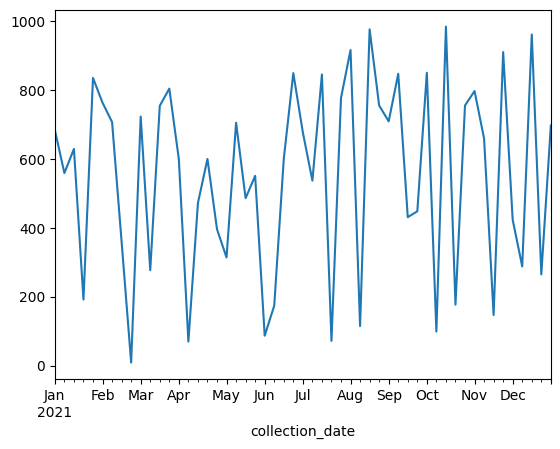

In [22]:
import matplotlib.pyplot as plt

dt_data6["value"].plot()
plt.show()

Bạn cũng có thể dịch chuyển dữ liệu theo thời gian (gọi là shift và lag). Ví dụ, lùi số liệu lại hai dòng.

In [23]:
dt_data6["value_lagged"] = dt_data6["value"].shift(-2)
dt_data6.head()

,value,value_lagged
collection_date,,
2021-01-01,684,629.0
2021-01-08,559,192.0
2021-01-15,629,835.0
2021-01-22,192,763.0
2021-01-29,835,707.0


Bạn cũng có thể shift / lag thời gian thay vì giá trị.

In [24]:
dt_data6["value"].shift(-2, "D").head()

collection_date
2020-12-30    684
2021-01-06    559
2021-01-13    629
2021-01-20    192
2021-01-27    835
Name: value, dtype: int32

---

[Bài trước](./13_string.ipynb) - [Danh sách bài](../README.md) - [Bài sau](./15_categorical.ipynb)